# Bike Sharing Assignment

## Problem Statement 

## STEP-1 Reading, Understanding and Visualising Data

In [315]:
############# Importing libraries ##############
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [316]:
############ Reading dataset ##############
bikesharing= pd.read_csv("day.csv")

In [317]:
#Head
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [318]:
#Shape
bikesharing.shape

(730, 16)

In [319]:
#Info
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [320]:
# Describe for numerical features
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.1 Data Cleaning

In [321]:
# Checking missing values
bikesharing.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Note: No missing values are found in the dataset. 

In [322]:
#################### Removing variables that are not revelant ######################### 
# 1.instant which simply denotes the indexes.
# 2.dteday has redunant info holds by mnth and yr.
# 3.casual and registered is redunant and their information present in cnt

bikesharing.drop(["instant","dteday","casual","registered"],axis = 1,inplace=True)

In [323]:
############## Renaming the columns for better readability ##########################
bikesharing.rename(columns={'yr':'year','mnth':'month','atemp':"feel_temp",'hum':'humidity',"cnt":"count"}, inplace=True)

In [324]:
bikesharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [325]:
############ Checking duplicates ###############################
bikesharing[bikesharing.duplicated()] 


,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,count


### Note: No duplicates found in the dataset.

In [326]:
############ Checking for Outlier ####################
bikesharing.describe(percentiles=[0.25,0.5,0.75,.90,.95,.99])

,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
90%,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,7293.800000
95%,4.000000,1.000000,12.000000,0.000000,6.000000,1.000000,2.000000,31.520460,35.749975,86.868735,22.999988,7576.400000
99%,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.868050,38.941650,92.795857,27.380948,8163.810000


### Note: Numeric variables seems to have gradual in increase in the percentile hence the oultier presence almost negligible 

### 1.2 Data Visualisation

### 1.2.1 Visualisation for Outlier detection

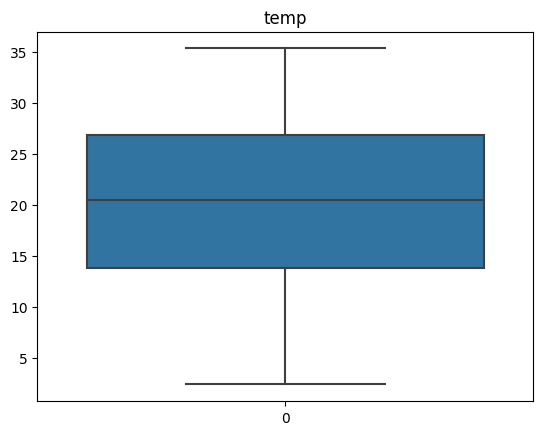

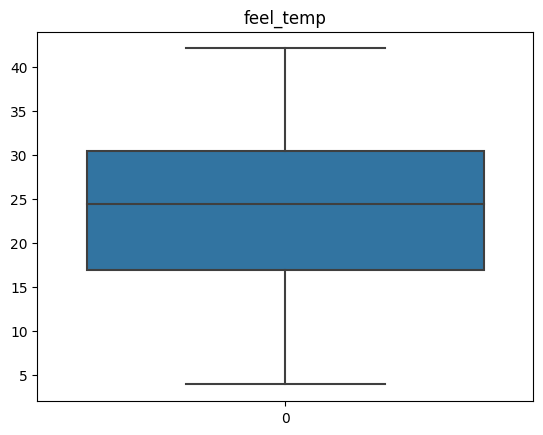

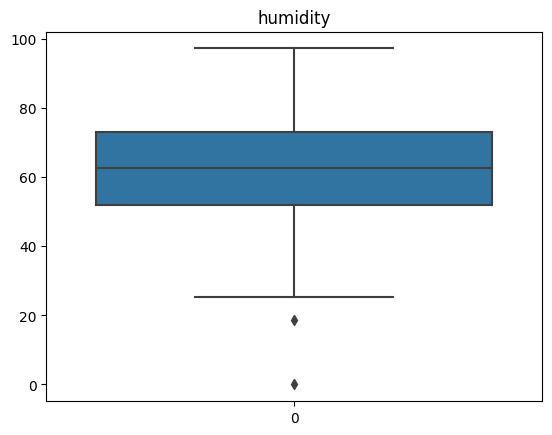

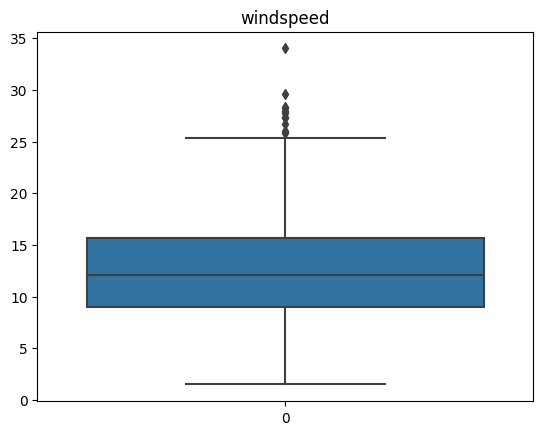

In [327]:
numeric_col=['temp','feel_temp','humidity','windspeed']
#Plot for Outlier
for i in numeric_col:
    plt.figure()
    sns.boxplot(bikesharing[i]).set(title=i)

 ### Note: windspeed and humidity variables seems to have some amount outlier which will be taken care of while scaling the variables using MinMax normalisation method

### 1.2.2 Visualising numerical features with Target variable i.e count

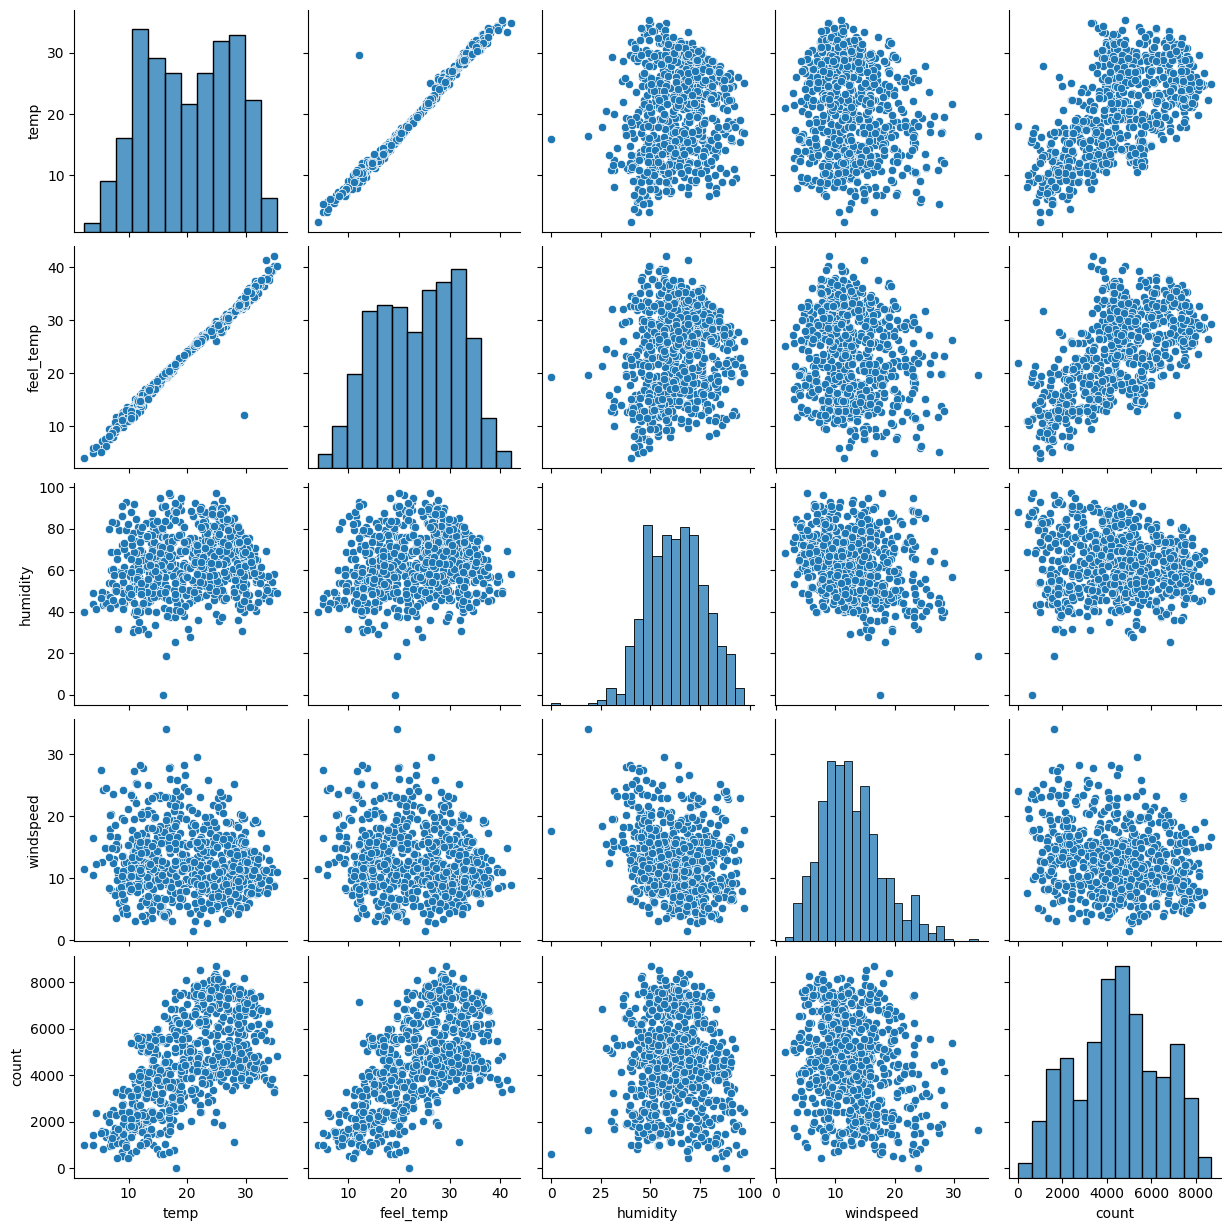

In [328]:
sns.pairplot(bikesharing,vars=['temp','feel_temp','humidity','windspeed','count'])
plt.show()

### NOTE: feel_temp and temp seems to have good linear relationship with count, however humidity and windspeed are not that linear 

### 1.2.3 Visualisation for Categorical Variable

In [329]:
######## Encoding categorical variables with labels for better understanding and plot interpretation #############
df = bikesharing.copy()
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['year'] = df['year'].map({0:"2018",1:"2019"})
df['month'] = df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [330]:
df.describe()

,holiday,workingday,temp,feel_temp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


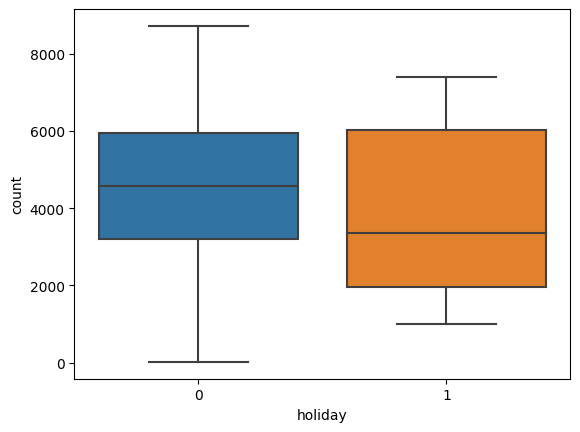

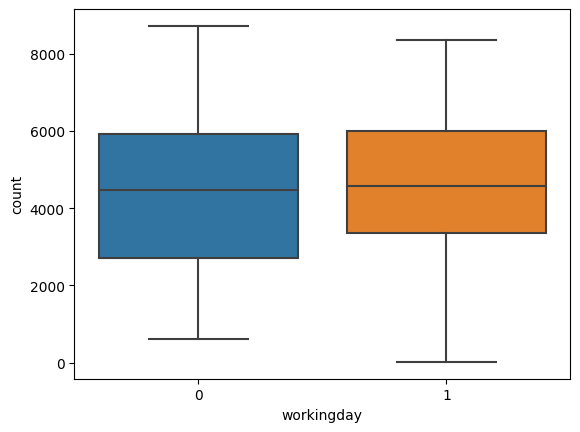

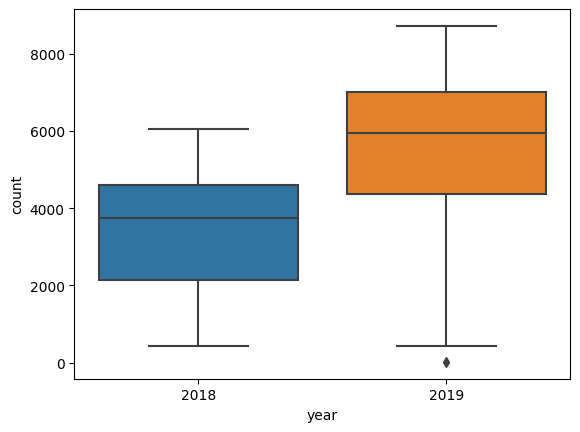

In [331]:
## BOX plots with Boolean categoric variables##########
categorical_col=["holiday","workingday","year"]
for i in categorical_col:
    plt.figure() 
    sns.boxplot(x=i,y="count",data=df)
    

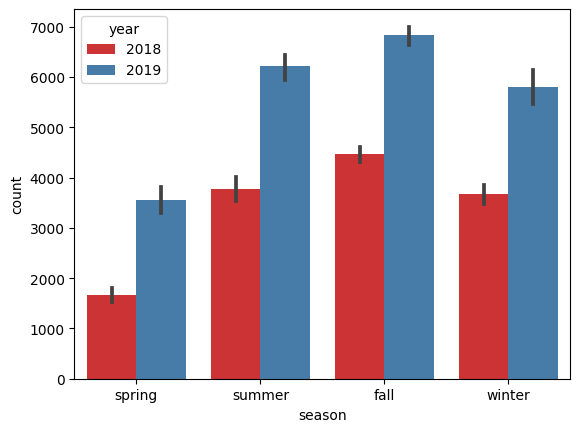

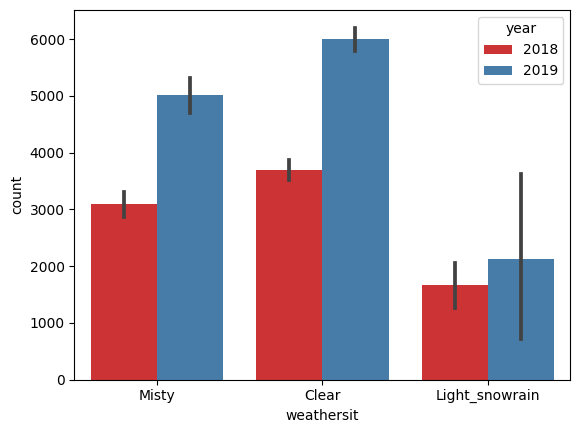

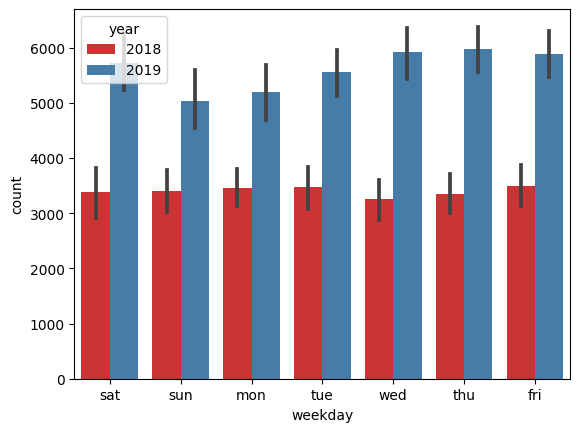

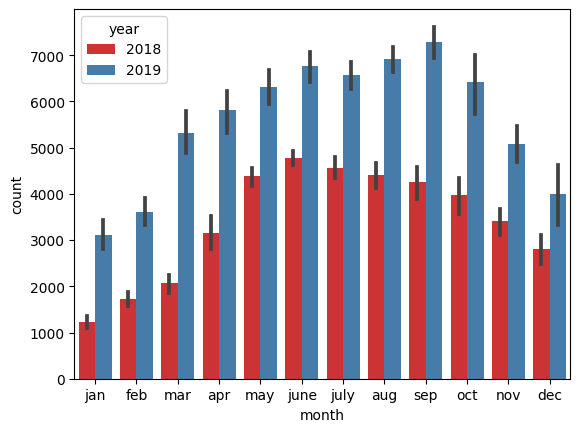

In [332]:
######## Count Plots of each  categorical variable with target ###############
categorical_col=["season","weathersit","weekday","month"]
for i in categorical_col:
    plt.figure() 
    sns.barplot(x=i,y="count",data=df, hue='year',palette='Set1')
    

### NOTE: sub categories of season, weathersit, and month show high variablity with target variable "Count" as compare to weekdays

### 1.2.4 Visualisation for Coorelation

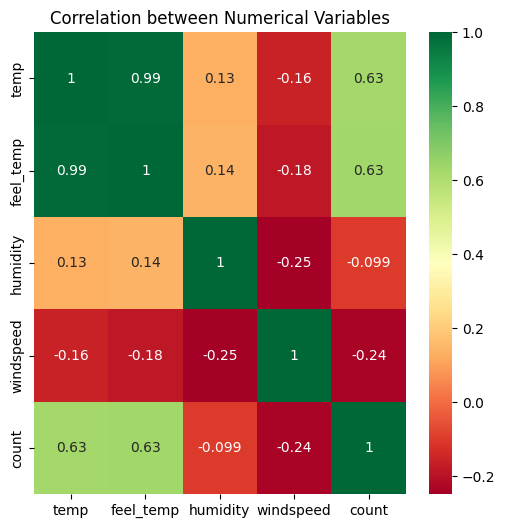

In [333]:
##### Checking co-linearity in
plt.figure(figsize = (6,6))
sns.heatmap(df[['temp','feel_temp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

### Note: From the aboove plot its clear that temp and feel_temp has strong corelation. Considerisation of either one of the varaible is required for model building. 

## STEP-2 Preparing Data for Modeling

### 2.1 Creating dummy variables for multi categorical variables 

In [334]:
############ Creating dummy variables for season, weathersit, month, weekday #######################
# Droping a redundant dummy variable everytime.

season_df=pd.get_dummies(df["season"],drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df["weathersit"],drop_first=True,dtype=int)
month_df=pd.get_dummies(df["month"],drop_first=True,dtype=int)
weekday_df=pd.get_dummies(df["weekday"],drop_first=True,dtype=int)

In [335]:
# Merging dataframes and droping unneccary variables. 
df_new = pd.concat([df,season_df,weathersit_df,month_df,weekday_df],axis=1)
df_new.drop(["season","weathersit","month","weekday"],axis = 1,inplace=True)

### 2.2 Converting year back to boolen expression 

In [336]:
df_new['year'] = df_new['year'].map({"2018":0,"2019":1})

In [337]:
#Info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   feel_temp       730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   spring          730 non-null    int32  
 9   summer          730 non-null    int32  
 10  winter          730 non-null    int32  
 11  Light_snowrain  730 non-null    int32  
 12  Misty           730 non-null    int32  
 13  aug             730 non-null    int32  
 14  dec             730 non-null    int32  
 15  feb             730 non-null    int32  
 16  jan             730 non-null    int32  
 17  july            730 non-null    int

In [338]:
#Head
df_new.head()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,count,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### 2.3 Splitting Data into Train and Test

In [339]:
df_train, df_test=train_test_split(df_new,train_size=0.7,random_state = 100)

In [340]:
#Shape
df_train.shape
df_test.shape

(220, 30)

### 2.4 Rescaling the Dataset using MinMax Scaler

In [341]:
################ Rescaling the numeric variables ###################
## This is required for better interpretation and efficient model building.

# Initaiting the object
scaler = MinMaxScaler()

# Fit on the data
numeric_vars=["temp","feel_temp","humidity","windspeed","count"]
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [342]:
#Describe to confirm normalisation
df_train.describe()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,count,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## STEP-3 Building of model

### 3.1 Making Heatmap of variables 

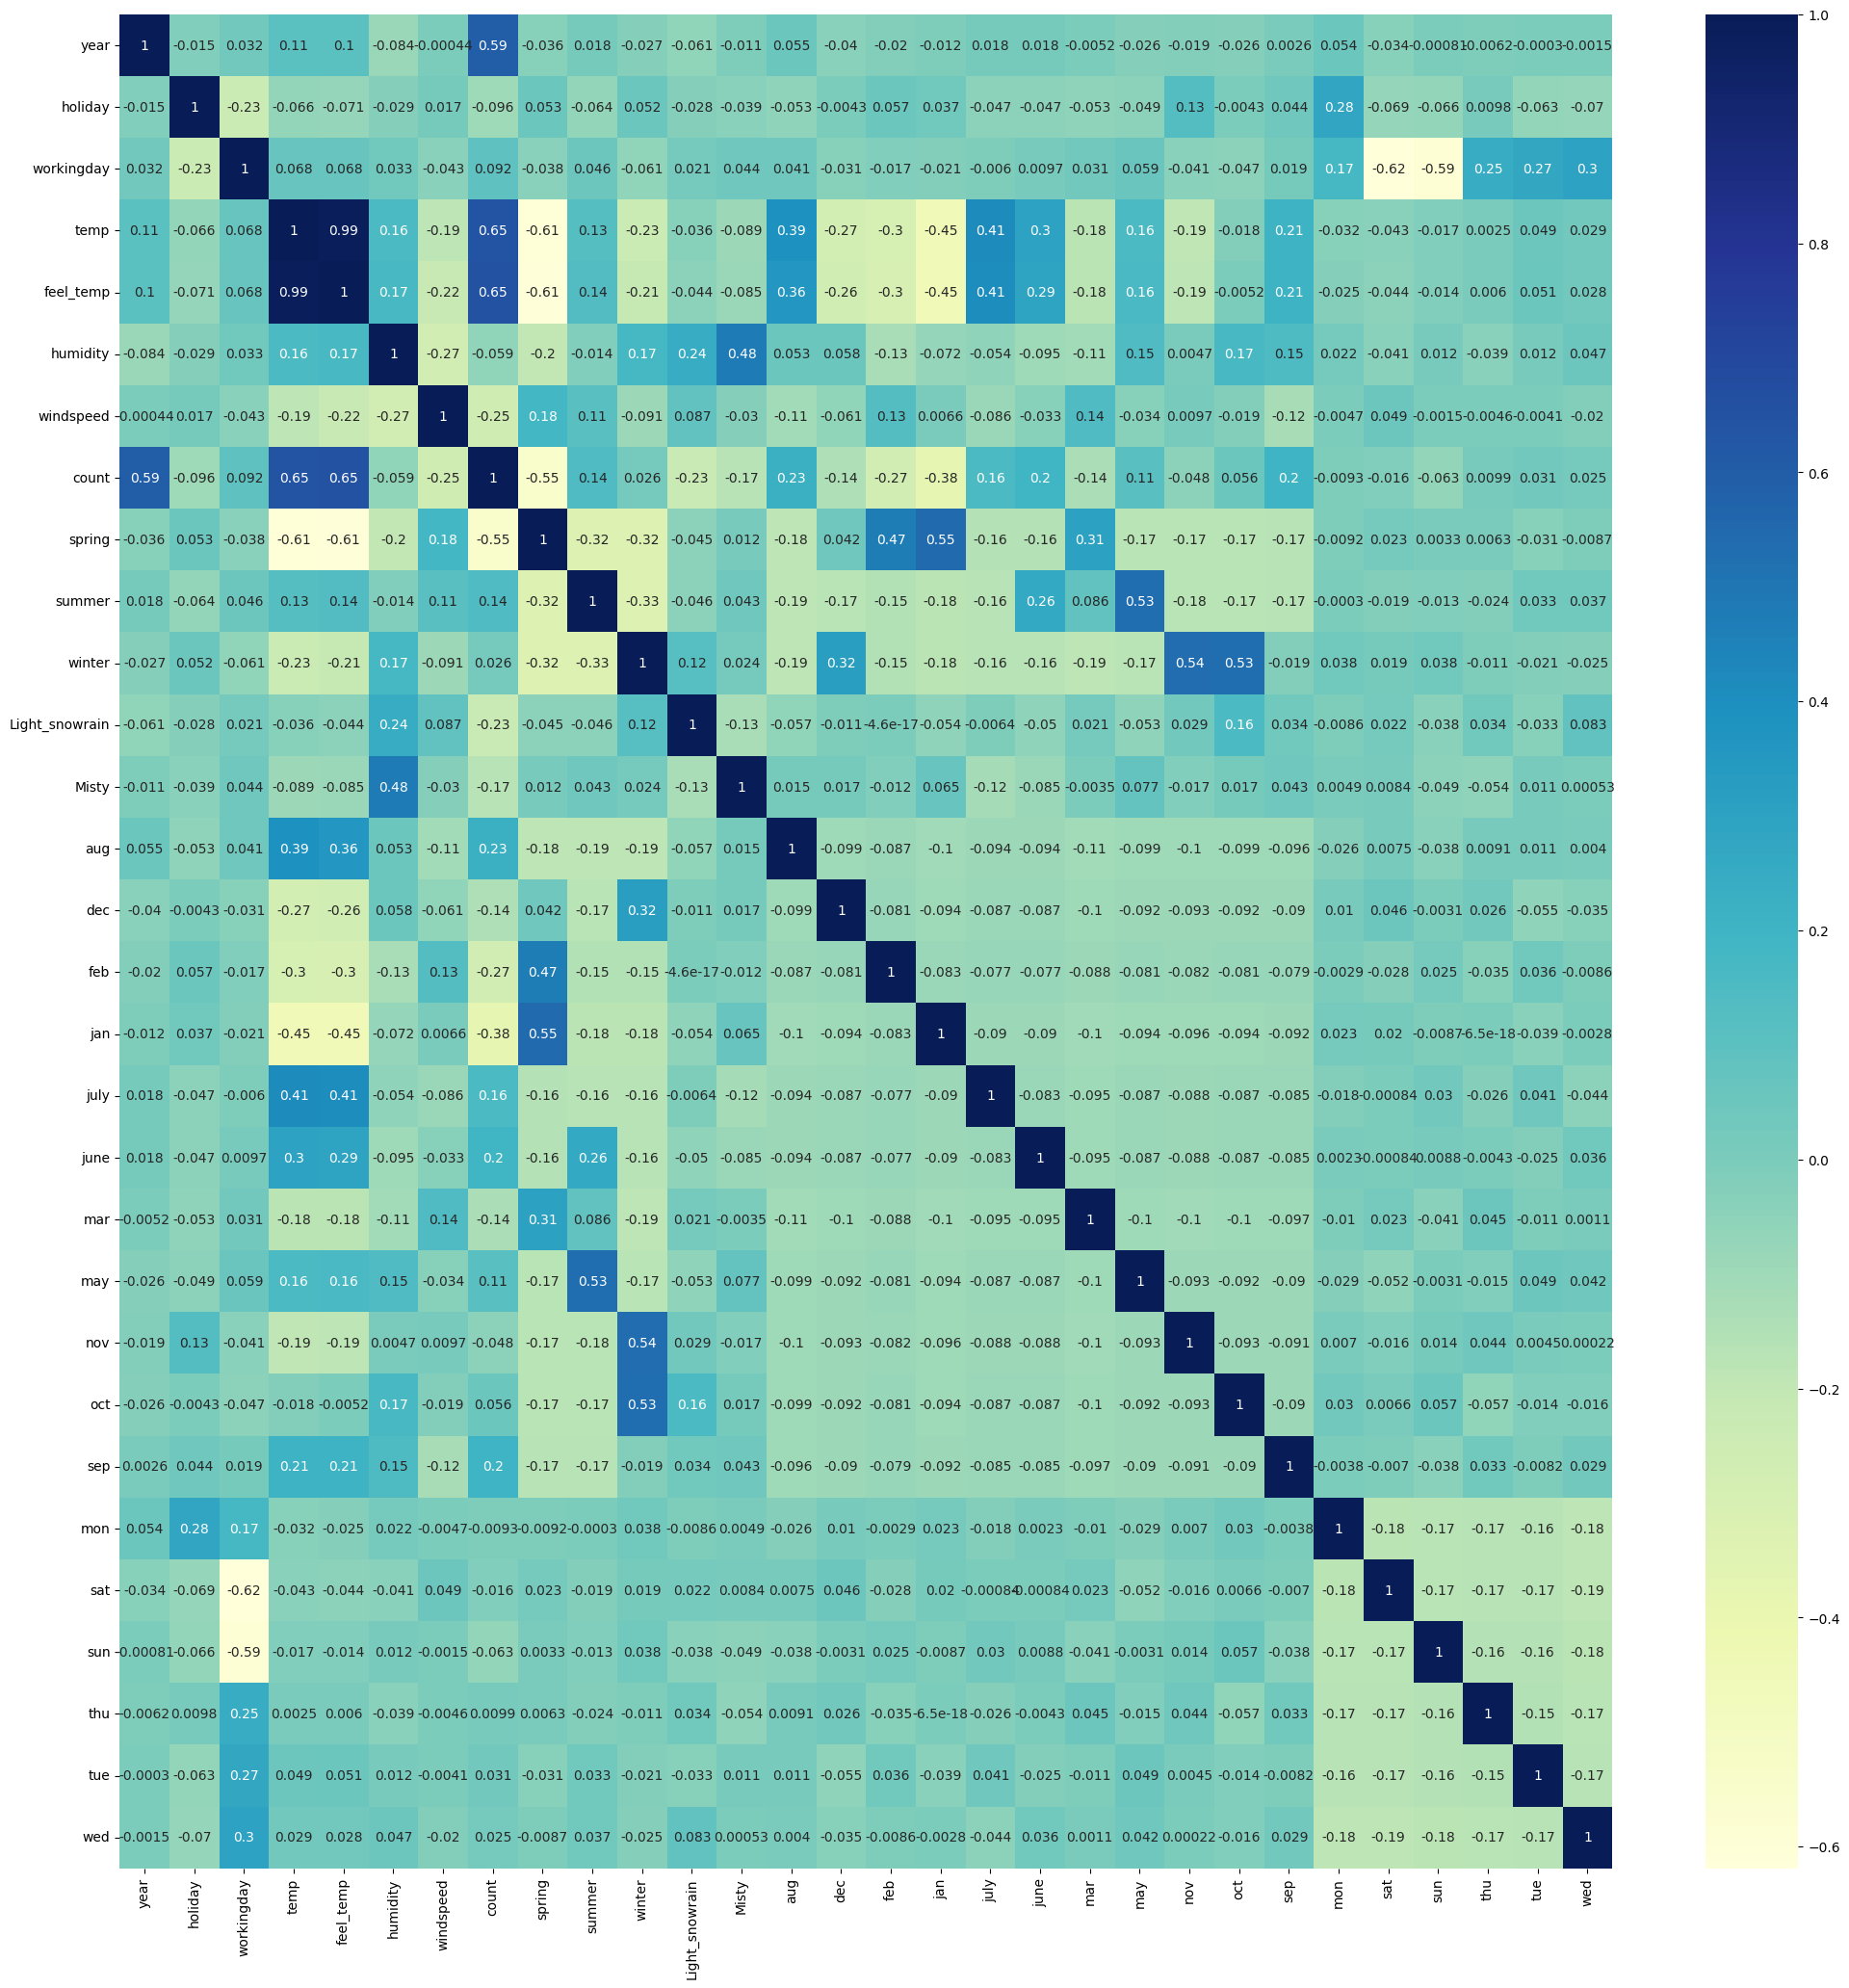

In [343]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Note: Count (Target Variable) shows strong positivie correlation with year, temp, feel_temp and strong negative correlation with Spring rest other variables have less value in correlation hence to select important features we will use feature selection technique.


### 3.2 Feature Selection using RFE 

In [344]:
#Dividing df_train in X and Y parts
y_train = df_train.pop('count')
X_train = df_train

In [345]:
X_train.shape

(510, 29)

In [346]:
X_train.head()

,year,holiday,workingday,temp,feel_temp,humidity,windspeed,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'feel_temp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'Light_snowrain', 'Misty',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [348]:
# Recursive feature elimination 
## This is required to build model on important features that are worth considering. It is automated algo which will be combine with manual fine tuning
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# Retaining selected features
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

### 3.3 Linear Regression Model-1 

In [349]:
# Building 1st linear regression model
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        22:39:25   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

### Note: From the above summary we found the following variables as non significant
Holiday


### Linear Regression Model-2

In [350]:
# Removing variables that are its highly insignificant
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [351]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        22:39:26   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1811      0.042      4.

### 3.4 Estimating VIFs for further clarifications

In [352]:
#Function for calculating VIF
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [353]:
# Calling function
vifs= VIF(X_train_new)
vifs

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
12,sat,4.91
5,spring,4.80
13,sun,4.76
7,winter,3.69
6,summer,3.04
9,Misty,2.31


### Note
Following variables have high VIF. i.e more than 5:
Humidity,temp,workingday

### Linear Regression Model-3

In [354]:
# Removing humidity from the dataset
X_train_new = X_train_rfe.drop(['holiday','humidity'], axis = 1)

In [355]:
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        22:39:26   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1008      0.038      2.

In [356]:
# Estimating VIFs again
vifs= VIF(X_train_new)

In [357]:
vifs

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
11,sat,4.45
12,sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,year,2.07
9,july,1.60


### Linear Regression Model-4

In [358]:
# Removing workingday from the dataset
X_train_new = X_train_rfe.drop(['holiday','humidity',"workingday"], axis = 1)
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.06e-186
Time:                        22:39:26   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.030      6.

In [359]:
# Estimating VIFs again
vifs= VIF(X_train_new)

In [360]:
vifs

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,year,2.07
5,winter,1.82
8,july,1.59
7,Misty,1.55
9,sep,1.33
10,sat,1.22


### Linear Regression Model-5

In [361]:
# Removing workingday from the dataset
X_train_new = X_train_rfe.drop(['holiday','humidity',"workingday","sat"], axis = 1)
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          3.37e-187
Time:                        22:39:26   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2034      0.030      6.

In [362]:
#Estimating VIFs again
vifs= VIF(X_train_new)

In [363]:
vifs

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,year,2.07
5,winter,1.80
8,july,1.59
7,Misty,1.55
9,sep,1.33
10,sun,1.17


In [364]:
# Model Parameters
lm5.params

const             0.203387
year              0.233876
temp              0.491742
windspeed        -0.149694
spring           -0.068197
summer            0.047885
winter            0.081830
Light_snowrain   -0.284654
Misty            -0.080237
july             -0.048253
sep               0.072321
sun              -0.044959
dtype: float64

### NOTE
We can cosider Linear Regression model-5 as good model because of the following: 
-  Adj. R-squared: 0.832(capturing 83% of variance)
-  P values of all the variables/predictors are significant.
-  VIF values are equal and less than 5, hence multicollinearity is very less.as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
- F-Statistics value of 230 (which is greater than 1) and the p-value is very less, overall we can say that, states that the overall model is significant.

### STEP-4  Residual Analysis on the Train Data

In [365]:
#Train data
X_train_lm5.head()

,const,year,temp,windspeed,spring,summer,winter,Light_snowrain,Misty,july,sep,sun
576,1.0,1,0.815169,0.264686,0,0,0,0,0,1,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,1,0,0,0
728,1.0,1,0.245101,0.663106,1,0,0,0,0,0,0,1
482,1.0,1,0.395666,0.188475,0,1,0,0,1,0,0,0
111,1.0,0,0.345824,0.380981,0,1,0,0,1,0,0,0


In [366]:
# Prediction Y values
y_train_pred = lm5.predict(X_train_lm5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17968\1315286987.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


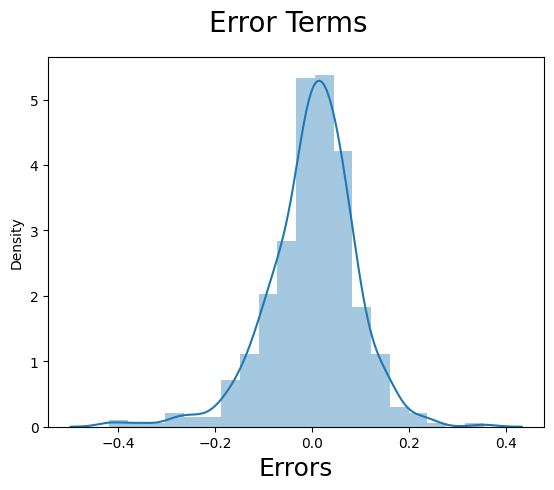

In [367]:
####### Checking Normality of Error terms ################
#Ploting
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Note: Error terms follows normal distributions, i.e centered with mean=0, Linear Regression Assumtion!

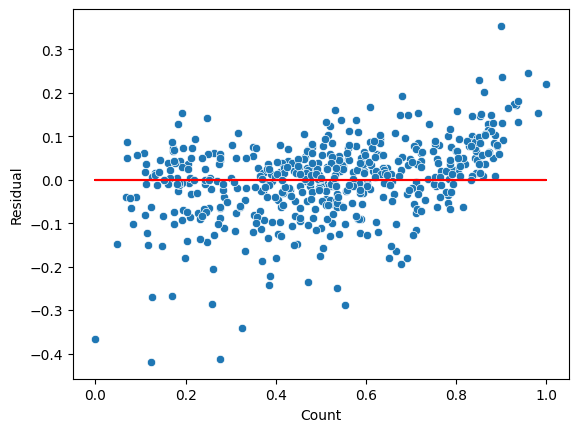

In [368]:
######### Checking error terms Constant Variance
res= y_train - y_train_pred
sns.scatterplot(x=y_train,y=res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### The residual shows constant variance with some points showing divergence. Linear Regression Assumtions!

### STEP-5 Making Predictions

In [369]:
#### Scaling the test dataset #########
# Fit on the data
numeric_vars=["temp","feel_temp","humidity","windspeed","count"]
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.describe()

# Creating Y and X
y_test = df_test.pop('count')
X_test = df_test

# Retaining only selected variables
cols = X_train_new.columns
X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

# Predicting y
y_test_pred = lm5.predict(X_test_lm5)

### STEP-6 Model Evaluation 

### 6.1 Plotting   actual values with predicted values

Text(0, 0.5, 'y_test_pred')

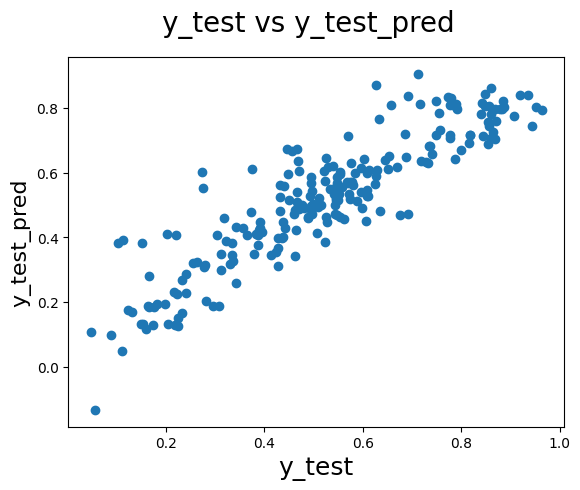

In [370]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

### 6.2 Predicting R2 Square 

In [371]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4) #####evaluate

0.8058

### 6.3 Calculating Adjusted R2 

In [372]:
adj_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adj_r2)

0.7955


### NOTE: R-2 Square for testing dataset close to train dataset  hence our model performance is good.

## Summary


In [373]:
# Formulating model equation
round(lm5.params,4)

const             0.2034
year              0.2339
temp              0.4917
windspeed        -0.1497
spring           -0.0682
summer            0.0479
winter            0.0818
Light_snowrain   -0.2847
Misty            -0.0802
july             -0.0483
sep               0.0723
sun              -0.0450
dtype: float64

### NOTE 

#### 1. The equation of our best fitted line is:
𝑐ount=0.2034+0.2339×𝑦𝑒𝑎𝑟+0.4917×𝑡𝑒𝑚𝑝−0.1497×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑−0.0682×𝑠𝑝𝑟𝑖𝑛𝑔+0.0479×𝑠𝑢𝑚𝑚𝑒𝑟+0.0818×𝑤𝑖𝑛𝑡𝑒𝑟−0.2847×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0802×𝑀𝑖𝑠𝑡𝑦−0.0483×july+0.0723×𝑠𝑒𝑝-0.0450×𝑠un.

#### 2. Model Performance on Train and Test
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.8058
- Train dataset Adjusted R^2 : 0.832    
- Test dataset Adjusted R^2  : 0.7955
R2 square values are quite similar in both test and train. Hence model performance is fair.

#### 3. The variables with high significance on which demand on bike depends are:
year, temp, windspedd, spring,summer,winter,lightsnowrain,Misty,July,Sep,sun

#### 4. 83% Variance for bike demand is covered by the predictors mentioned above.